https://github.com/jeffbass/imagezmq
    
Run the recevier

On RPI and in the dir containing `imagezmq.py` run:

```python
from imutils.video import VideoStream
import imagezmq
import argparse
import socket
import time

MAC_IP='192.168.1.133'

sender = imagezmq.ImageSender(connect_to="tcp://{}:5555".format(MAC_IP))

rpiName = socket.gethostname()
vs = VideoStream(usePiCamera=True).start()
#vs = VideoStream(src=0).start()
time.sleep(2.0)

while True:
    # read the frame from the camera and send it to the server
    frame = vs.read()
    sender.send_image(rpiName, frame)
```

Now run here

In [ ]:
import cv2
import imagezmq
image_hub = imagezmq.ImageHub()

In [ ]:
while True:  # show streamed images until Ctrl-C
    rpi_name, image = image_hub.recv_image()
    cv2.imshow(rpi_name, image) # 1 window for each RPi
    cv2.waitKey(1)
    image_hub.send_reply(b'OK')

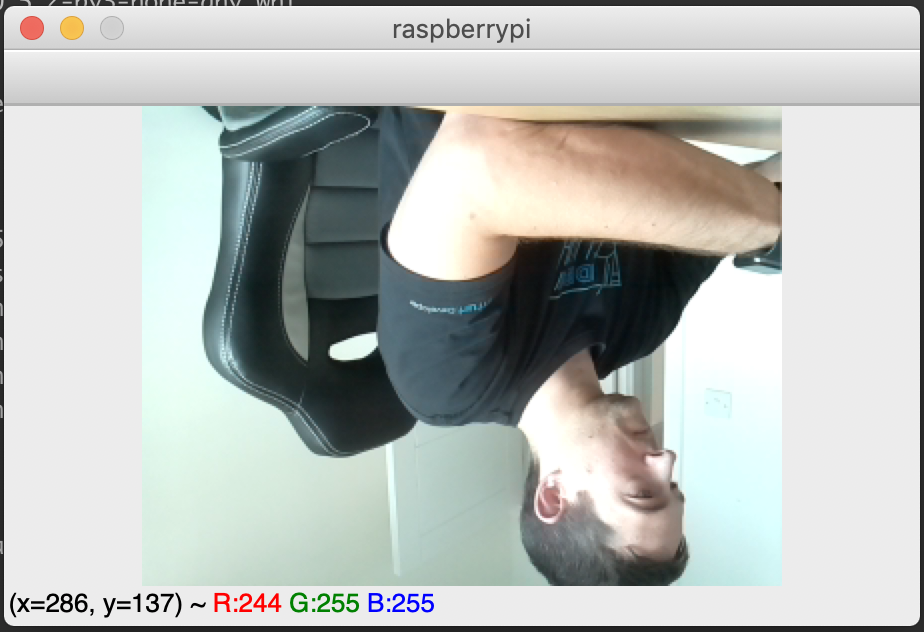

In [1]:
from IPython.display import Image
Image("image_zmq_usage.png")